Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

In [1]:
%%bash
cd ../chaste_build/
make MesenchymalCondensationSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 16%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 22%] Built target chaste_ode
[ 38%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
Scanning dependencies of target chaste_project_cartilage
[ 88%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/NodeBasedMesenchymalCondensation.cpp.o
[ 88%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/cell/cycle/ChondrocytesOnlyCellCycleModel.cpp.o
[ 88%] Linking CXX shared library libchaste_project_cartilage.so
[100%] Built target chaste_project_cartilage
Scanning dependencies of target MesenchymalCondensationSimulation
[100%] Building CXX object projects/cartilage/apps/CMakeFiles/MesenchymalCondensationSimulation.dir/src/MesenchymalCondensationSimulation.cpp.o
[100%] Linking CXX executable MesenchymalCondensationSimulation
[100%] Built target Mesenchymal

In [2]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
          'font.size': 12,
          'axes.titlepad': 12,
          'axes.labelpad': 12,
          #'font.family': 'serif',
          #"mathtext.fontset": "dejavuserif",
         }
plt.rcParams.update(params)

defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

path_to_label_files = '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/picked_result_files/'
path_to_plots = '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/plots/'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
output_directory = 'exp-draft/mesenchymal_condensation/orientation/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ''
#flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 80.0' # final time 100h
flags = flags + ' --sw 8' # 8 cells in x direction
flags = flags + ' --sd 12' # 12 cells in y direction
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 1.0' # 100% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --u 3.5' # set distance between boundaries to 3.5
flags = flags + ' --psl 4' # patch size limit set to 4
flags = flags + ' --g1t 10.0' # g1 phase duration for transit cells (exponentially distributed)
flags = flags + ' --ds 3.0' # s phase duration for all cells (fixed)
flags = flags + ' --sc 1.075' # scale the initial configuration in x-y direction
#flags = flags + ' --dt 0.004' # half the default time step
#flags = flags + ' --continue'
#flags = flags + ' --flat'
flags = flags + ' --lb0' #have lower bound at z=0, ie. symmetrical boundaries=false

flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation'

In [10]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=8, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-155402/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0 --rdd
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-155402/ --S 1 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0 --rdd
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-155402/ --S 2 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0 --rdd
nice -n 19 /home/kubuntu1804/Document

In [11]:
de.run_postprocessing_multiple_random_seeds(8, output_directory, start_time=0)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/6/results_from_time_0/', '/home/kubuntu1804/Documen

# A repulsion only force and oriented cell division enable column growth

## Data:
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-144756/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds, random cell division directions:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-150604/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05 --rdd
- 8 random seeds, activation percentage 100%:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-101413/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-141629/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds, activation percentage 100%, less cells, random cell division directions:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-104632/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --rdd
- 8 random seeds, activation percentage 100%
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-100916/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds, maxNumberTransitGenerations=12 (was 2 before)
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-113618/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds, maxNUmberTransitGenerations=12, random cell division directions:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-114752/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --rdd
- 8 random seeds, lb0:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-152730/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0
- 8 random seeds, lb0, rdd
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20220223-155402/ --S 0 --T 80.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --lb0 --rdd


## Average patch projection area

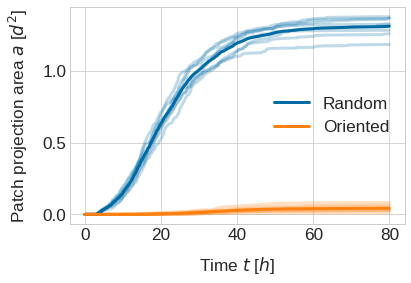

In [12]:
#dir_directed = 'exp-draft/mesenchymal_condensation/continue/20200505-141629/'
dir_directed = 'exp-draft/mesenchymal_condensation/orientation/20220223-152730/'
dir_random = 'exp-draft/mesenchymal_condensation/orientation/20220223-155402/'

# save label-path tuple
with open(path_to_label_files+'oriented_cd', 'w') as f:
    f.write(dir_directed+'0/')
with open(path_to_label_files+'random_cd', 'w') as f:
    f.write(dir_random+'0/')


# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    plt.plot(times_d, ppa, color=defcolors[1], alpha=0.25)
    ppa_av_d += ppa 
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times_r.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_random+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    plt.plot(times_r, ppa, color=defcolors[0], alpha=0.25)
    ppa_av_r += ppa
ppa_av_r = ppa_av_r /8



plt.plot(times_r, ppa_av_r, color=defcolors[0], label='Random')
plt.plot(times_d, ppa_av_d, color=defcolors[1], label='Oriented')
plt.legend()
#plt.title('distance 4.0')
plt.xlabel('Time $t$ [$h$]')
plt.ylabel('Patch projection area $a$ [$d^2$]')
plt.savefig(path_to_plots+'ppa_orientation.pdf', bbox_inches='tight')

## Simulation snapshots

In [27]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-152730/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-152730/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x557855ab06c0): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

In [26]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/ -t 800

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/
Time step is 800
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

vtkSMPVRepresentationProxy (0x55cd6de41690): Failed to determine the LookupTable being used.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeT

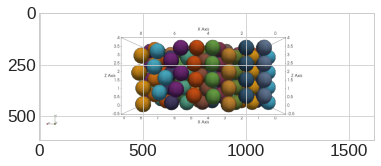

In [28]:
image = mpimg.imread("/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-152730/0/threshold_48_minus_y_t800.png")
plt.imshow(image)

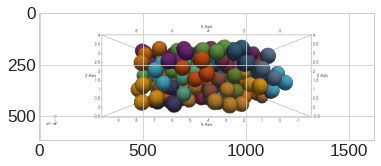

In [29]:
image = mpimg.imread("/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/orientation/20220223-155402/0/threshold_48_minus_y_t800.png")
plt.imshow(image)

# Space is needed to initially grow columns


## Data:
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/20200429-144756/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.05
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20200430-094725/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 0.75 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.00
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-101413/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20200505-110357/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.0
- 8 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/scaling/20200505-111740/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.1

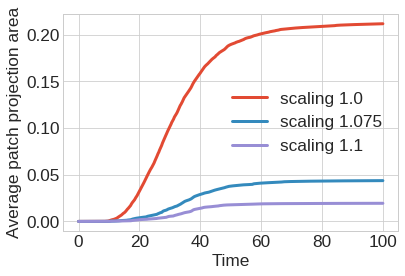

In [3]:
dir_100 = 'exp-draft/mesenchymal_condensation/scaling/20200505-110357/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_100+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='scaling 1.0')
#plt.legend()
#plt.xlabel('Time')
#plt.ylabel('Average patch projection area')


dir_1075 = 'exp-draft/mesenchymal_condensation/continue/20200505-141629/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_1075 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_1075+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='scaling 1.075')

dir_110 = 'exp-draft/mesenchymal_condensation/scaling/20200505-111740/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_110 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_110+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='scaling 1.1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')
plt.savefig(path_to_plots+'ppa_scaling.pdf', bbox_inches='tight')

# save label-path tuple
with open(path_to_label_files+'scaling_100', 'w') as f:
    f.write(dir_100+'0/')
with open(path_to_label_files+'scaling_110', 'w') as f:
    f.write(dir_110+'0/')

In [8]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20200505-110357/0/ -t 1000

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20200505-110357/0/
Time step is 1000
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

In [9]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20200505-111740/0/ -t 1000

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/scaling/20200505-111740/0/
Time step is 1000
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

# Initial distance from the perichondrial boundary is beneficial for straight column growth

Heterogeneity in the z-direction enforces sufficient distance to the boundary

This refers to the scaling of the initial condition. What about the heterogeneity in the z-direction? Is this still important for a scaled sheet?

Data:
- 8 random seeds, default:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-141629/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds, flat mesenchymal condensation:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20200506-111626/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat
- 8 random seeds, flat mesenchymal condensation, boundaries symmetrical around z=0 (continue flag is unnecessary)
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20200513-155712/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue --flat
- 8 random seeds, flat mesenchymal condensation, lower boundary at z=0
       nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/flat/20200513-161955/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --flat --lb0

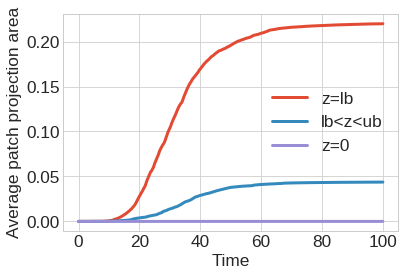

In [4]:
dir_default = 'exp-draft/mesenchymal_condensation/continue/20200505-141629/'
dir_flat = 'exp-draft/mesenchymal_condensation/flat/20200513-155712/'
dir_lb0 = 'exp-draft/mesenchymal_condensation/flat/20200513-161955/'

# save label-path tuple
with open(path_to_label_files+'flat', 'w') as f:
    f.write(dir_flat+'0/')
    
# save label-path tuple
with open(path_to_label_files+'lb0', 'w') as f:
    f.write(dir_lb0+'0/')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_default+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat + '0/results_from_time_0/') 

ppa_av_r = np.zeros(times_r.shape)
for seed in range(8):
    ppa_av_r = ppa_av_r + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_flat+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_r = ppa_av_r /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_l, coords_l = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_lb0 + '0/results_from_time_0/') 

ppa_av_l = np.zeros(times_l.shape)
for seed in range(8):
    ppa_av_l = ppa_av_l + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_lb0+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_l = ppa_av_l /8

plt.plot(times_l, ppa_av_l, label='z=lb')
plt.plot(times_d, ppa_av_d, label='lb<z<ub')
plt.plot(times_r, ppa_av_r, label='z=0')
plt.legend()
#plt.title('distance 4.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')
plt.savefig(path_to_plots+'ppa_flat.pdf', bbox_inches='tight')

Hmm. This means that all the difficulty in growing columns in our current setup stems from the boundary influence. If you do not hit the boundary before you need to stop, growing columns is easy (provided you have enough space around you, ie. the scaling is just big enough to offset the perturbation of the initial coordinates.) Looking back this is not surprising, because without rigid boundary we already had perfect column growth.

In [11]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20200513-155712/0/ -t 1000

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20200513-155712/0/
Time step is 1000
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

In [12]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20200513-161955/0/ -t 1000

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/flat/20200513-161955/0/
Time step is 1000
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

# Order in the columns can only be maintained until a certain thickness of the sheet

Data:

- 8 random seeds, psl 4:

      nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/orientation/20200505-101413/ --S 0 --sbt --T 100.0 --sw 10 --sd 20 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075

- 8 random seeds, psl 6:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20200505-113036/ --S 0 --sbt --T 140.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 5.5 --psl 6 --g1t 10.0 --ds 3.0 --sc 1.075
- 8 random seeds, psl 8:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/order/20200505-120136/ --S 0 --sbt --T 180.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 6.5 --psl 8 --g1t 10.0 --ds 3.0 --sc 1.075

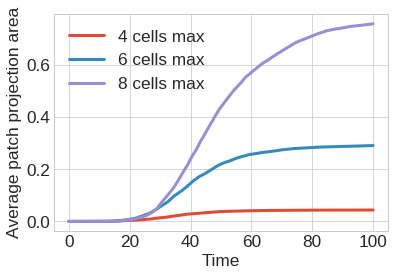

In [5]:
dir_4 = 'exp-draft/mesenchymal_condensation/continue/20200505-141629/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_4 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_4+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8


plt.plot(times_d, ppa_av_d, label='4 cells max')
#plt.legend()
#plt.xlabel('Time')
#plt.ylabel('Average patch projection area')


dir_6 = 'exp-draft/mesenchymal_condensation/order/20200505-113036/'

# save label-path tuple
with open(path_to_label_files+'psl_6', 'w') as f:
    f.write(dir_6+'0/')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d[:1001], ppa_av_d[:1001], label='6 cells max')

dir_8 = 'exp-draft/mesenchymal_condensation/order/20200505-120136/'

# save label-path tuple
with open(path_to_label_files+'psl_8', 'w') as f:
    f.write(dir_8+'0/')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_8 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa = np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_8+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_d = ppa_av_d + ppa
    #plt.plot(times_d, ppa, linestyle='--', color='grey', alpha=0.5)
ppa_av_d = ppa_av_d /8


plt.plot(times_d[:1001], ppa_av_d[:1001], label='8 cells max')

plt.legend()
plt.xlabel('Time')
#plt.xlim([-5,100])
plt.ylabel('Average patch projection area')
plt.savefig(path_to_plots+'ppa_order.pdf', bbox_inches='tight')

In [13]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20200505-113036/0/ -t 1000

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20200505-113036/0/
Time step is 1000
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

In [5]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20200505-120136/0/ -t 1000


Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/order/20200505-120136/0/
Time step is 1000
Start time is 0


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 

# It is more efficient to keep order by increasing column size than to grow larger columns from scratch

- 8 random seeds (unnecessarily long run)
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-134710/ --S 0 --sbt --T 180.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200505-141629/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue
- 8 random seeds, symmetric increase in boundary distance 
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MesenchymalCondensationSimulation --output-dir exp-draft/mesenchymal_condensation/continue/20200506-151324/ --S 0 --sbt --T 100.0 --sw 8 --sd 12 --mu 0.0 --A 1.0 --F pwq --mu_R 20.0 --p 0.1 --u 3.5 --psl 4 --g1t 10.0 --ds 3.0 --sc 1.075 --continue

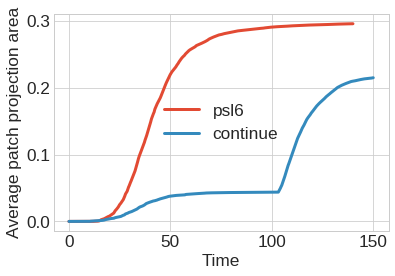

In [6]:
dir_continue = 'exp-draft/mesenchymal_condensation/continue/20200506-151324/'
dir_psl6 = 'exp-draft/mesenchymal_condensation/order/20200505-113036/'

# save label-path tuple
with open(path_to_label_files+'continue', 'w') as f:
    f.write(dir_continue+'0/')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_psl6 + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(8):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_psl6+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /8

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_r, coords_r = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+ '0/results_from_time_0/') 
times_r2, coords_r2 = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue + '0/results_from_time_100/') 

ppa_av_r = np.zeros(len(times_r)+len(times_r2))
for seed in range(8):
    ppa_av_r[:len(times_r)] = ppa_av_r[:len(times_r)] + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ppa_av_r[len(times_r):] = ppa_av_r[len(times_r):] + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_continue+str(seed)+'/results_from_time_100/metrics_results/data_patch_projection_area_av.txt', dtype=float)

ppa_av_r = ppa_av_r /8


plt.plot(times_d, ppa_av_d, label='psl6')
plt.plot(np.concatenate((times_r, times_r2)), ppa_av_r, label='continue')

plt.legend()
#plt.title('distance 4.0')
plt.xlabel('Time')
plt.ylabel('Average patch projection area')
plt.savefig(path_to_plots+'ppa_continue.pdf', bbox_inches='tight')

Interesting! Note that this improved when the increase in distance between the boundaries is symmetric, ie we don't just raise the upper boundary but also lower the lower boundary (both by half of the total increase.)

In [14]:
%%bash
pvpython analysis/paraview_show_clonal_patches.py -i /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/continue/20200506-151324/0/ -t 500 -s 100

Input file path is /home/kubuntu1804/Documents/sf_simulation_results/exp-draft/mesenchymal_condensation/continue/20200506-151324/0/
Time step is 500
Start time is 100


Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/Volume/vtkVolumeTextureMapper3D.cxx, line 680
vtkVolumeTextureMapper3D::vtkVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed in a future version.

Generic Warning: In /build/paraview-lH8wFv/paraview-5.4.1+dfsg3/VTK/Rendering/VolumeOpenGL/vtkOpenGLVolumeTextureMapper3D.cxx, line 57
vtkOpenGLVolumeTextureMapper3D::vtkOpenGLVolumeTextureMapper3D was deprecated for VTK 7.0 and will be removed 